In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score as score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
data = pd.read_csv('./data1.csv' , header='infer')

In [3]:
data

,candidateID,candidatePublicID,universityRollNo,firstName,lastName,emailID,alternateEmailID,mobileNumber,10th_percentage,12th_percentage,...,Computer Programming(Score_5),Computer Programming(Percentile_5),Automata(Score_812),Computer Science(Score_189),Computer Science(Percentile_189),0,Company Name,ON/OFF Campus=0,Package,Total
0,525,1.300000e+14,15BCS1003,Ramanjot,Kaur,ramanjotmall84@gmail.com,cu.15bcs1003@gmail.com,7717205523,88.00,71.00,...,355,34.9,0,346,39.3,0,"teleperformance,mohali",1,0.0,2597.90
1,495,1.300000e+14,15BCS1004,Bhushan,Mittal,cu.15bcs1004@gmail.com,aayush320@gmail.com,9501207017,80.67,93.40,...,725,99.7,0,531,88.6,0,"Cognizant Technology, Pune",1,2.5,3895.77
2,414,1.300000e+14,15BCS1005,Gurpreet,Singh,sgurpreet33@gmail.com,gmusic303@gmail.com,9569015858,85.50,68.00,...,185,3.2,0,285,22.4,0,0,0,0.0,2118.50
3,783,1.300000e+14,15BCS1008,Vinay,Patel,vpjune96@gmail.com,vinaypateljune015@gmail.com,9780513585,80.00,68.90,...,515,83.9,0,469,76.2,0,0,0,0.0,3167.50
4,1020,1.300000e+14,15BCS1010,Vishu,Vishu,vishuverma1997@gmail.com,0,9478033275,94.00,72.00,...,335,28.8,0,408,58.9,0,0,0,0.0,2707.20
5,362,1.300000e+14,15BCS1011,Ishita,Sharma,ishukanavs@gmail.com,cu.15bcs1011@gmail.com,9882146270,83.00,73.00,...,445,65.1,0,408,58.9,0,"nineleaps,banglore",1,0.0,2764.40
6,229,1.300000e+14,15BCS1012,Mehar,Kaur,mehar.deep786@gmail.com,cu.15bcs1012@gmail.com,8194992503,6.50,6.92,...,175,2.6,0,254,15.7,0,0,0,0.0,1579.42
7,392,1.300000e+14,15BCS1013,Khushwant,Manoti,manotinicky@gmail.com,cu.15bcs1013@gmail.com,7742167725,9.20,74.80,...,455,68.2,0,346,39.3,0,"Cognizant Technology Solutions,Pune",1,2.5,2977.10
8,593,1.300000e+14,15BCS1014,Pranay,Deep,pds1997@gmail.com,pranaydeep45@gmail.com,9915823996,8.60,66.00,...,425,58.5,0,377,49.0,0,0,0,0.0,2956.20
9,175,1.300000e+14,15BCS1017,Rahul,Kumar,rahul.sharest@gmail.com,vivekteli1@gmail.com,9878556631,57.00,60.60,...,275,14.1,0,315,30.2,0,0,0,0.0,1957.70


In [4]:
d=data.iloc[:,[8,9,10,16,17,18,19,20,21,22,23,24,25,26,27,30,32]].copy()

In [5]:
d

,10th_percentage,12th_percentage,collegePercentage,WriteX_Total Score,English Comprehension(Score_1),English Comprehension(Percentile_1),Logical Ability(Score_13),Logical Ability(Percentile_13),Quantitative Ability (Advanced)(Score_2),Quantitative Ability (Advanced)(Percentile_2),Computer Programming(Score_5),Computer Programming(Percentile_5),Automata(Score_812),Computer Science(Score_189),Computer Science(Percentile_189),ON/OFF Campus=0,Total
0,88.00,71.00,62.0,1,500,59.9,485,57.8,460,38.0,355,34.9,0,346,39.3,1,2597.90
1,80.67,93.40,85.0,3,665,97.1,555,81.4,695,95.9,725,99.7,0,531,88.6,1,3895.77
2,85.50,68.00,70.0,3,545,75.8,445,42.2,285,3.4,185,3.2,0,285,22.4,0,2118.50
3,80.00,68.90,71.0,3,580,85.3,540,77.1,475,43.1,515,83.9,0,469,76.2,0,3167.50
4,94.00,72.00,68.0,3,510,63.7,445,42.2,520,58.6,335,28.8,0,408,58.9,0,2707.20
5,83.00,73.00,80.0,3,430,32.6,445,42.2,535,63.6,445,65.1,0,408,58.9,1,2764.40
6,6.50,6.92,60.0,0,300,4.0,410,29.3,310,5.4,175,2.6,0,254,15.7,0,1579.42
7,9.20,74.80,75.0,3,570,82.9,570,85.1,535,63.6,455,68.2,0,346,39.3,1,2977.10
8,8.60,66.00,69.0,2,545,75.8,565,83.9,560,71.4,425,58.5,0,377,49.0,0,2956.20
9,57.00,60.60,69.0,2,335,8.1,445,42.2,300,4.5,275,14.1,0,315,30.2,0,1957.70


In [11]:
n=d.shape[0]
n=int(n)
type(n)

int

In [7]:
d.columns

Index(['10th_percentage', '12th_percentage', 'collegePercentage',
       'WriteX_Total Score', 'English Comprehension(Score_1)',
       'English Comprehension(Percentile_1)', 'Logical Ability(Score_13)',
       'Logical Ability(Percentile_13)',
       'Quantitative Ability (Advanced)(Score_2)',
       'Quantitative Ability (Advanced)(Percentile_2)',
       'Computer Programming(Score_5)', 'Computer Programming(Percentile_5)',
       'Automata(Score_812)', 'Computer Science(Score_189)',
       'Computer Science(Percentile_189)', 'ON/OFF Campus=0', 'Total'],
      dtype='object')

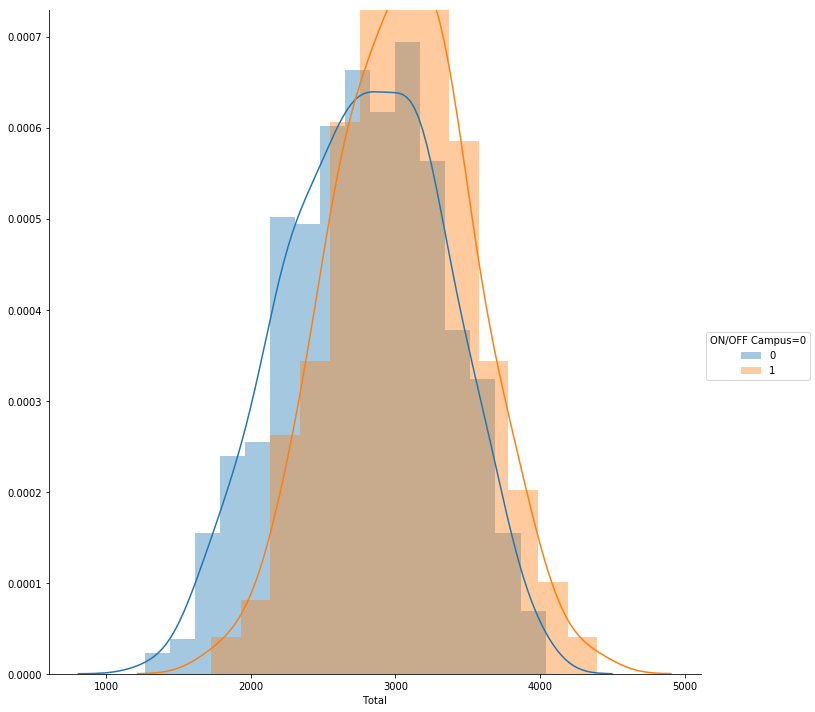

In [8]:
sns.FacetGrid(data , hue = "ON/OFF Campus=0", size = 10).map(sns.distplot,"Total").add_legend()
plt.show()

In [11]:
d.columns

Index(['10th_percentage', '12th_percentage', 'collegePercentage',
       'WriteX_Total Score', 'English Comprehension(Score_1)',
       'English Comprehension(Percentile_1)', 'Logical Ability(Score_13)',
       'Logical Ability(Percentile_13)',
       'Quantitative Ability (Advanced)(Score_2)',
       'Quantitative Ability (Advanced)(Percentile_2)',
       'Computer Programming(Score_5)', 'Computer Programming(Percentile_5)',
       'Automata(Score_812)', 'Computer Science(Score_189)',
       'Computer Science(Percentile_189)', 'ON/OFF Campus=0', 'Total'],
      dtype='object')

Observation
1.as the above univariate analysis says 10th data is helpful in prediction of y_labels
2.Those students who have more than 75% marks have greater chances of getting placed

In [22]:
d.columns

Index(['10th_percentage', '12th_percentage', 'collegePercentage',
       'WriteX_Total Score', 'English Comprehension(Score_1)',
       'English Comprehension(Percentile_1)', 'Logical Ability(Score_13)',
       'Logical Ability(Percentile_13)',
       'Quantitative Ability (Advanced)(Score_2)',
       'Quantitative Ability (Advanced)(Percentile_2)',
       'Computer Programming(Score_5)', 'Computer Programming(Percentile_5)',
       'Automata(Score_812)', 'Computer Science(Score_189)',
       'Computer Science(Percentile_189)', 'ON/OFF Campus=0', 'Total'],
      dtype='object')

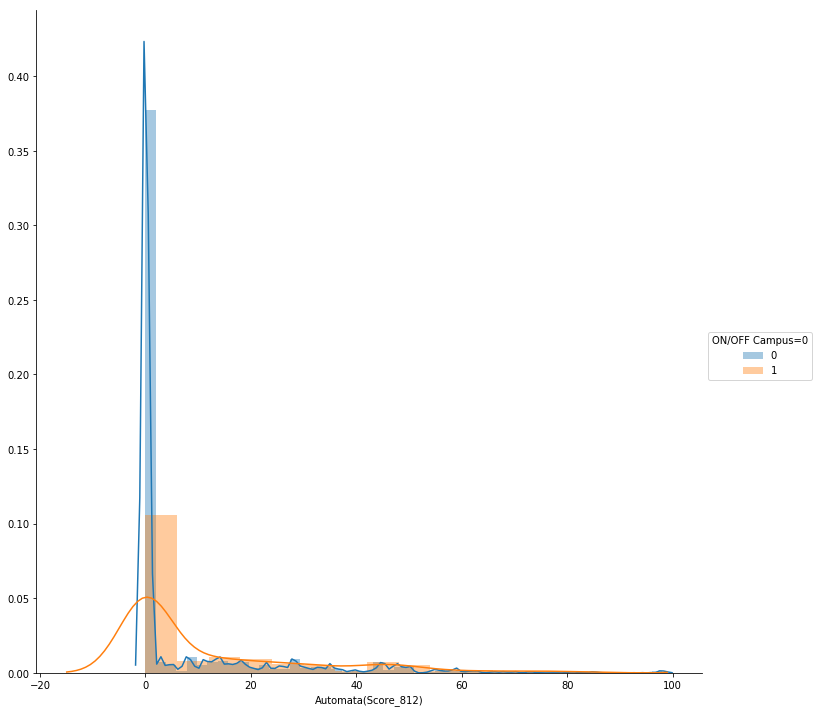

In [23]:
sns.FacetGrid(d , hue = "ON/OFF Campus=0", size = 10).map(sns.distplot, "Automata(Score_812)").add_legend()
plt.show()

observation:
1. 12th percentage marks plays a significant role in the modeling
2. students who have greater than 65% marks are benifitted significantly

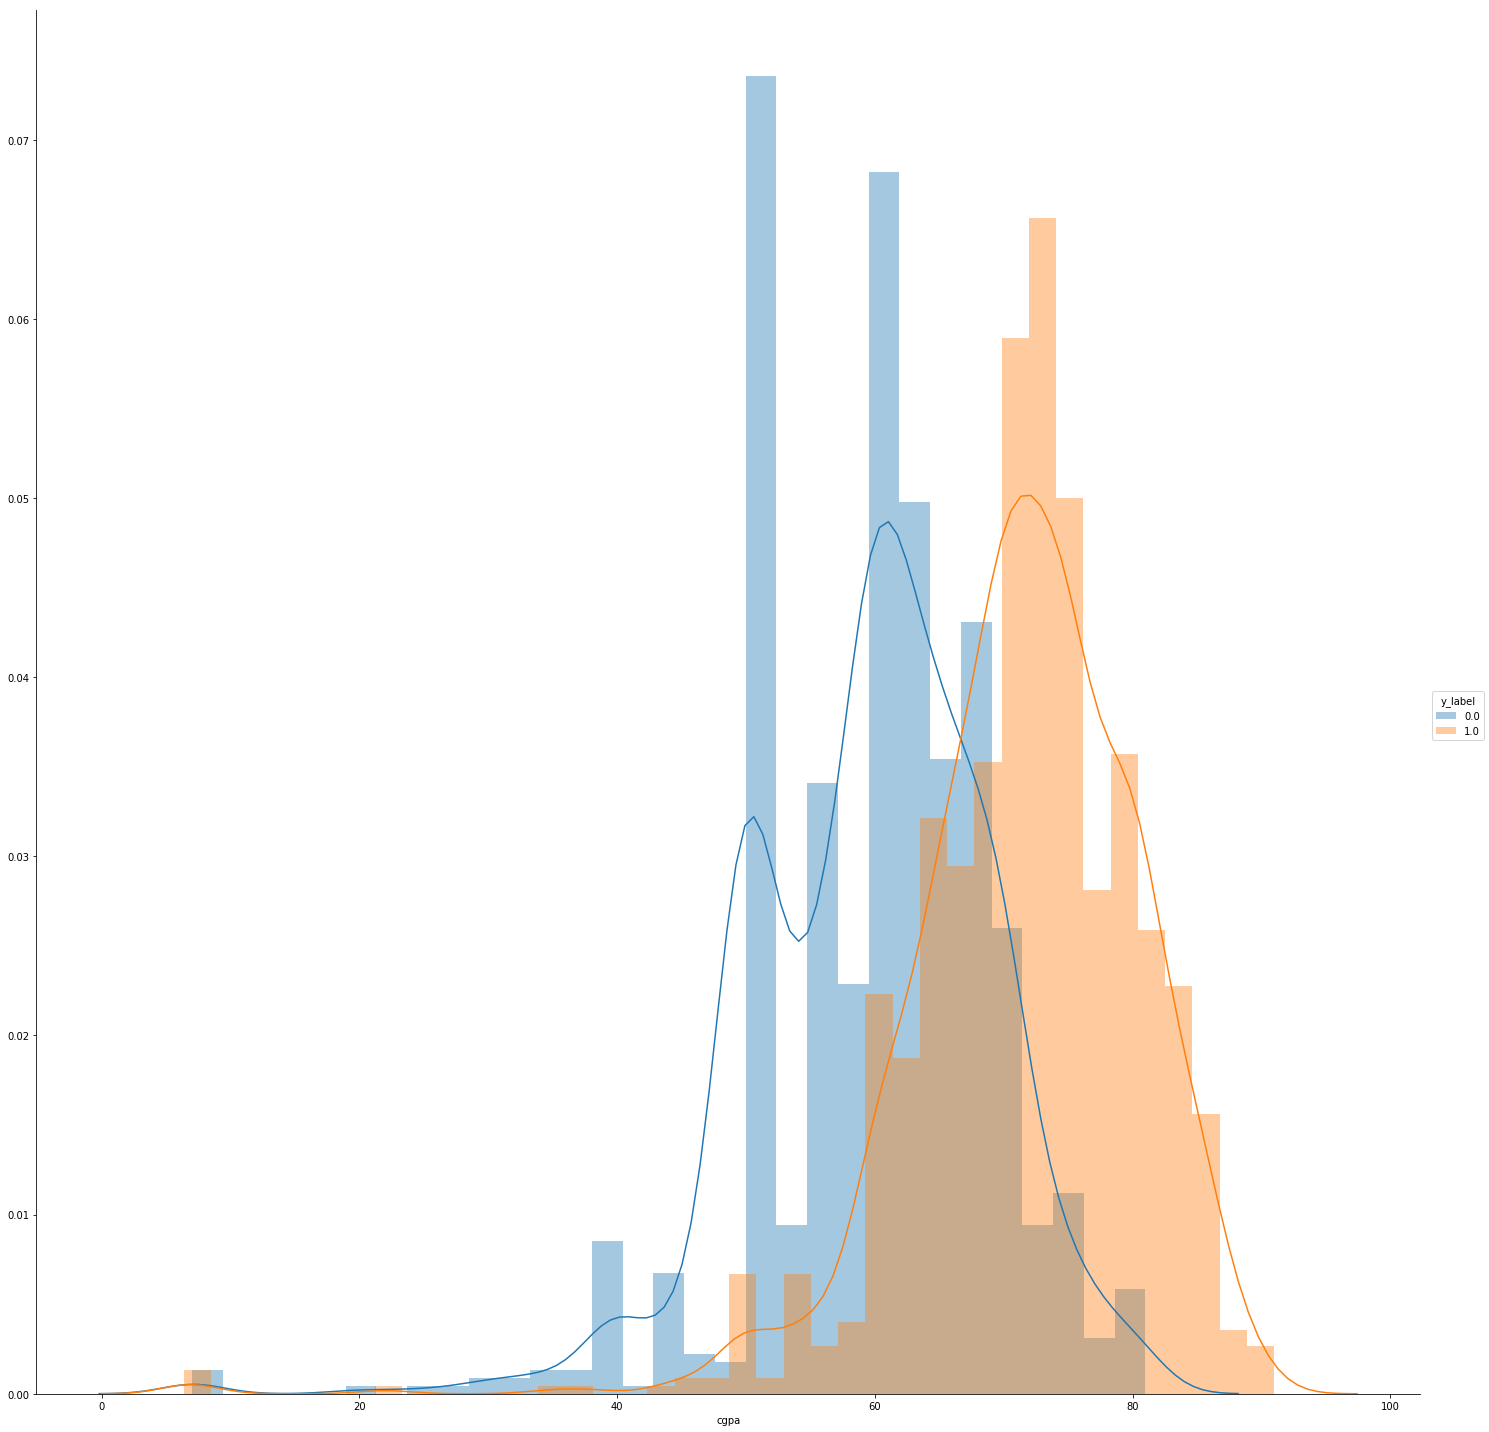

In [9]:
sns.FacetGrid(data , hue = "y_label", size = 20 ).map(sns.distplot, "cgpa").add_legend()
plt.show()

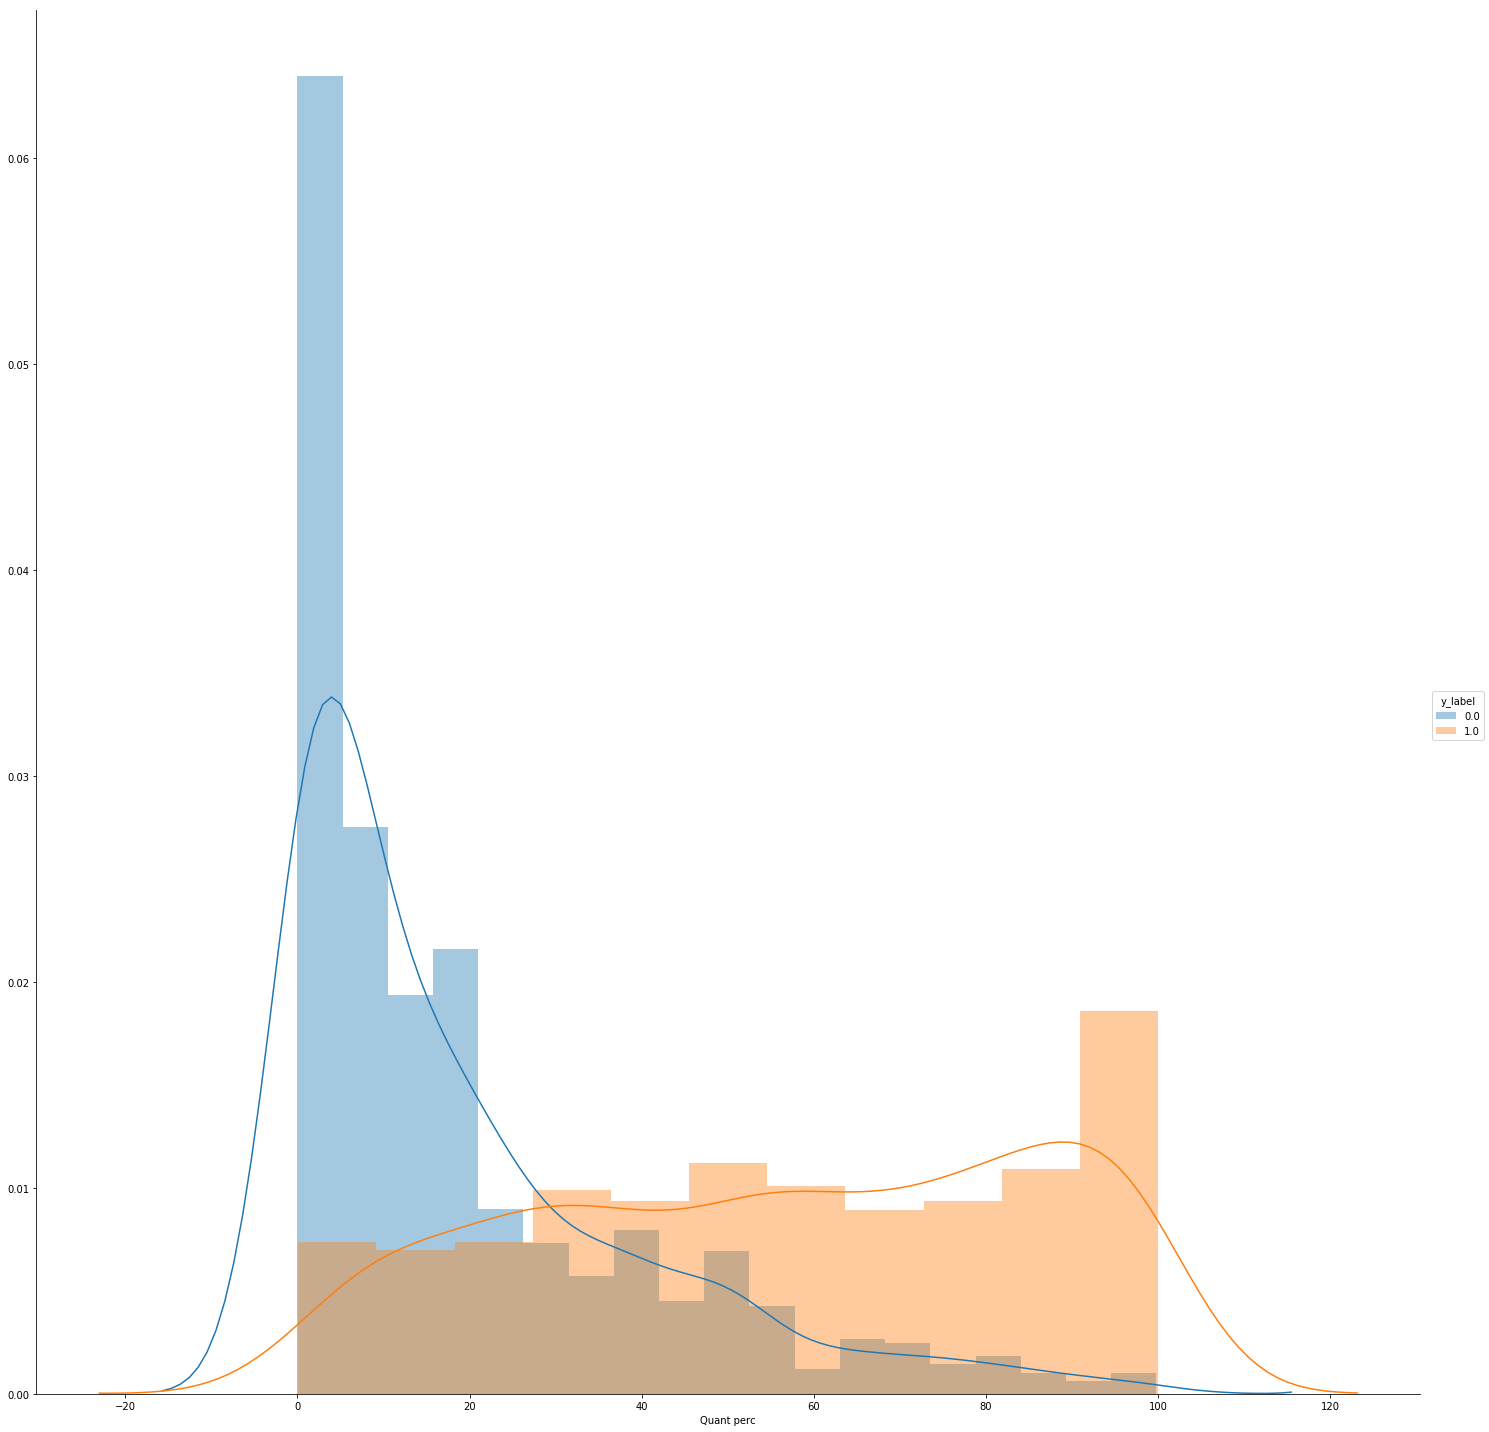

In [10]:
sns.FacetGrid(data , hue = "y_label", size = 20 ).map(sns.distplot, "Quant perc").add_legend()
plt.show()

1. less precise in significant feature for prediction

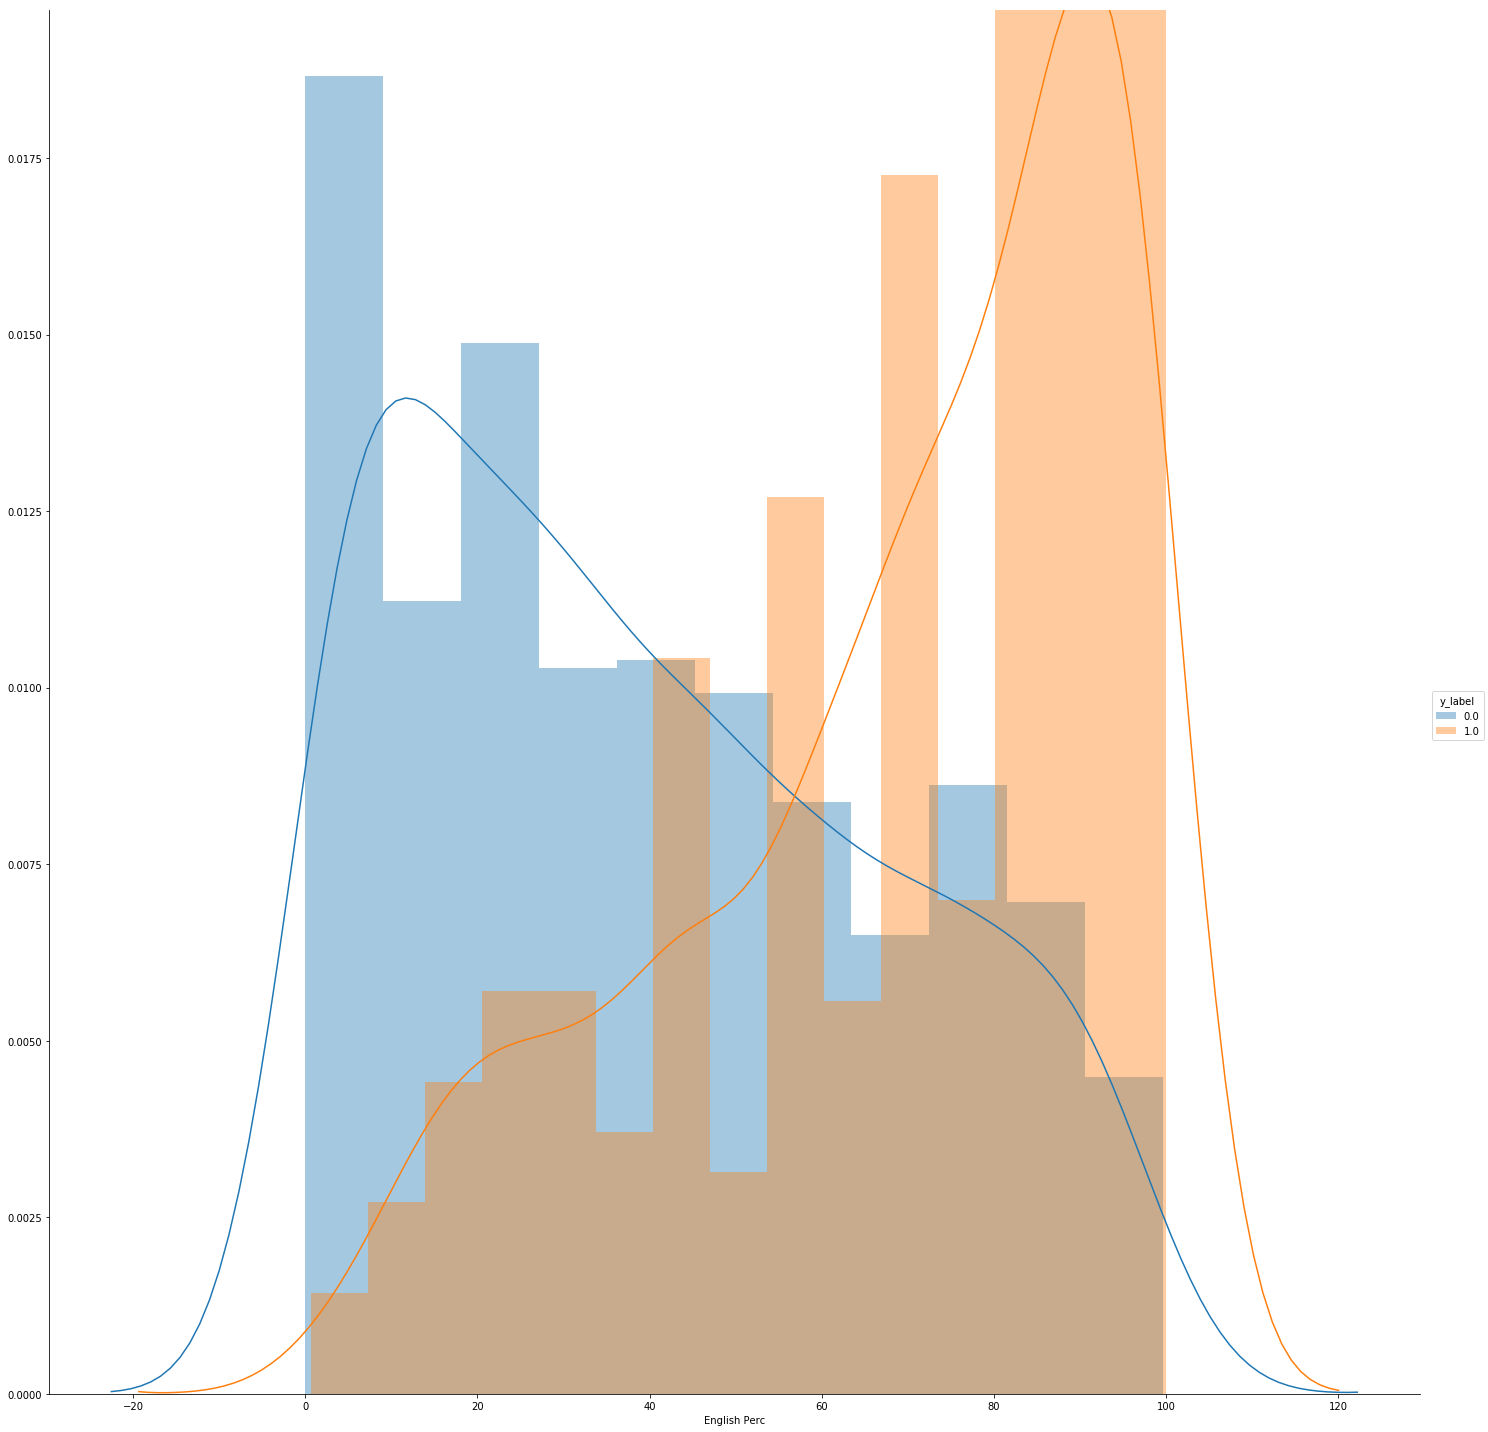

In [11]:
sns.FacetGrid(data , hue = "y_label", size = 20 ).map(sns.distplot, "English Perc").add_legend()
plt.show()

1. less precise model hard to make sense out of it

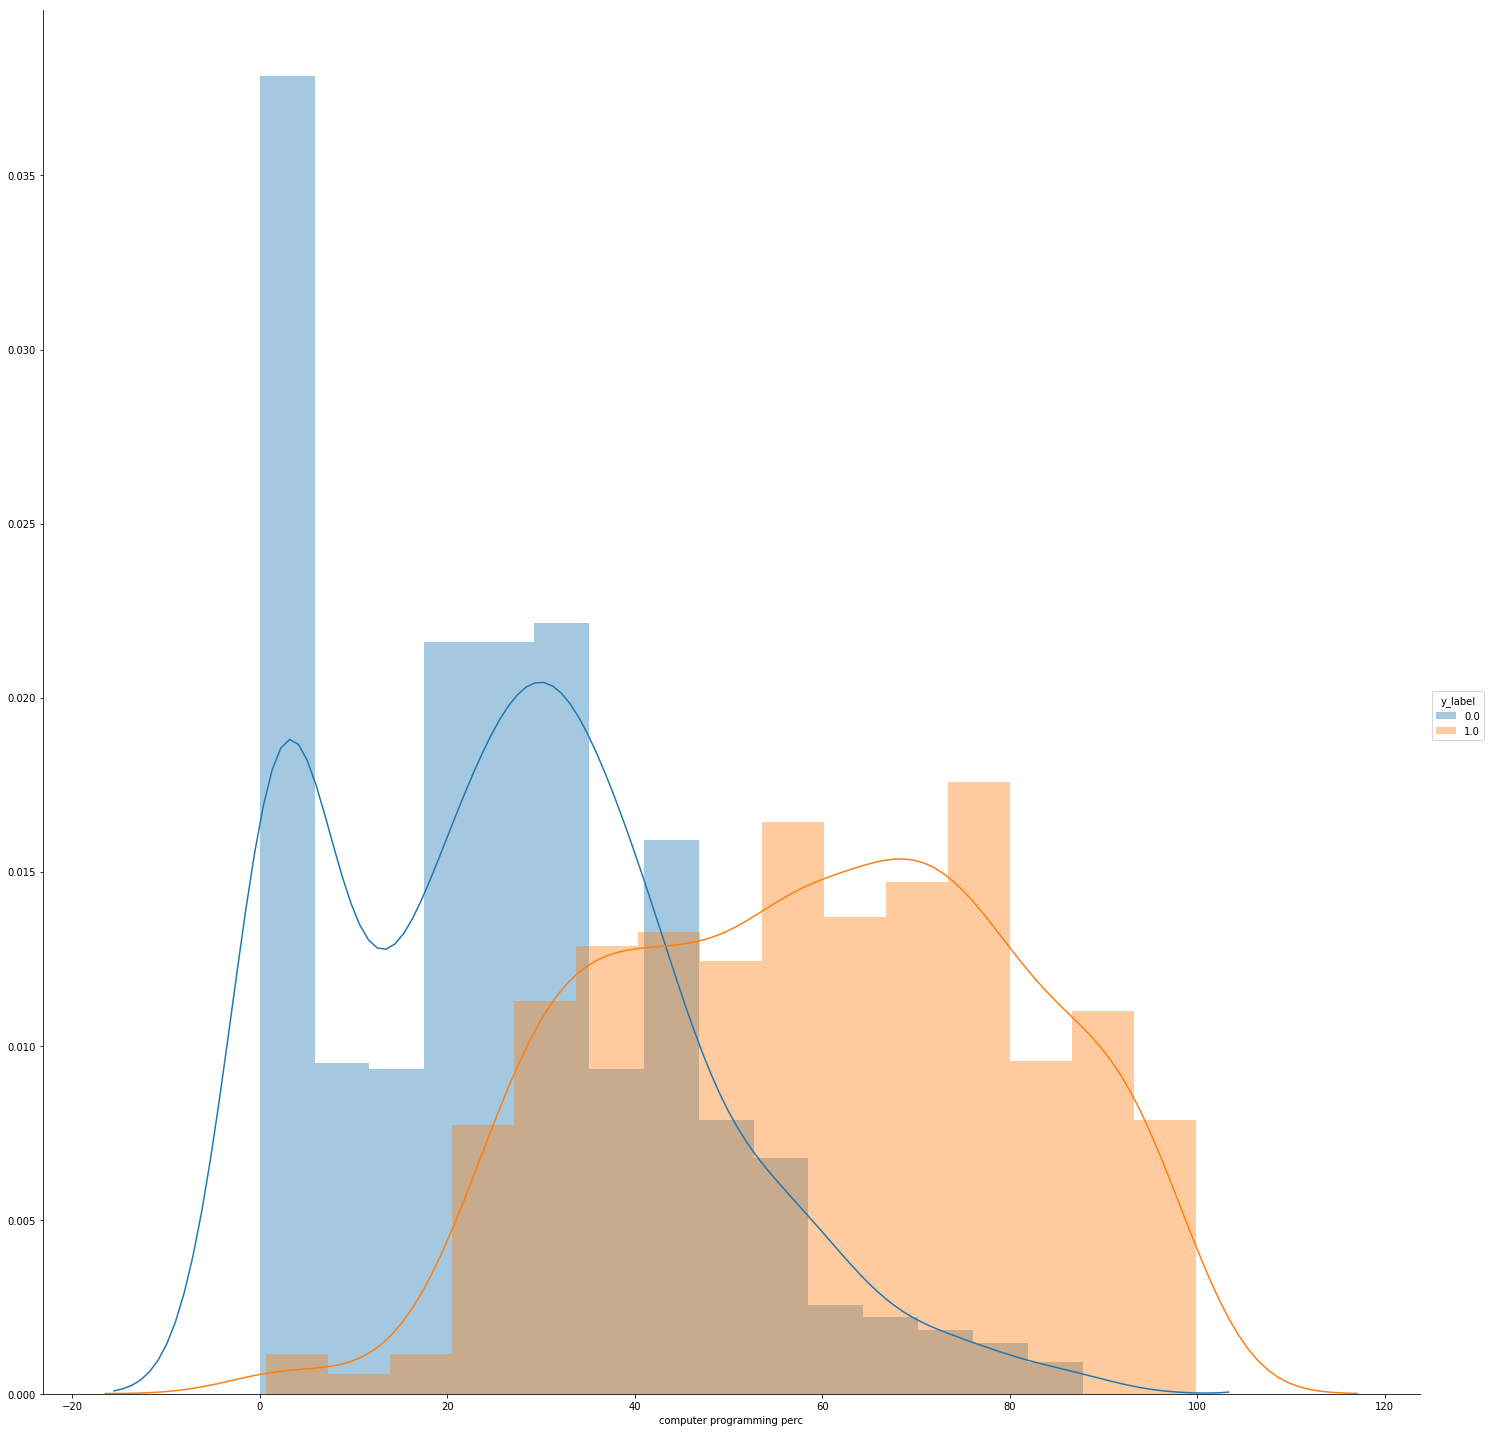

In [12]:
sns.FacetGrid(data , hue = "y_label", size = 20 ).map(sns.distplot, "computer programming perc").add_legend()
plt.show()

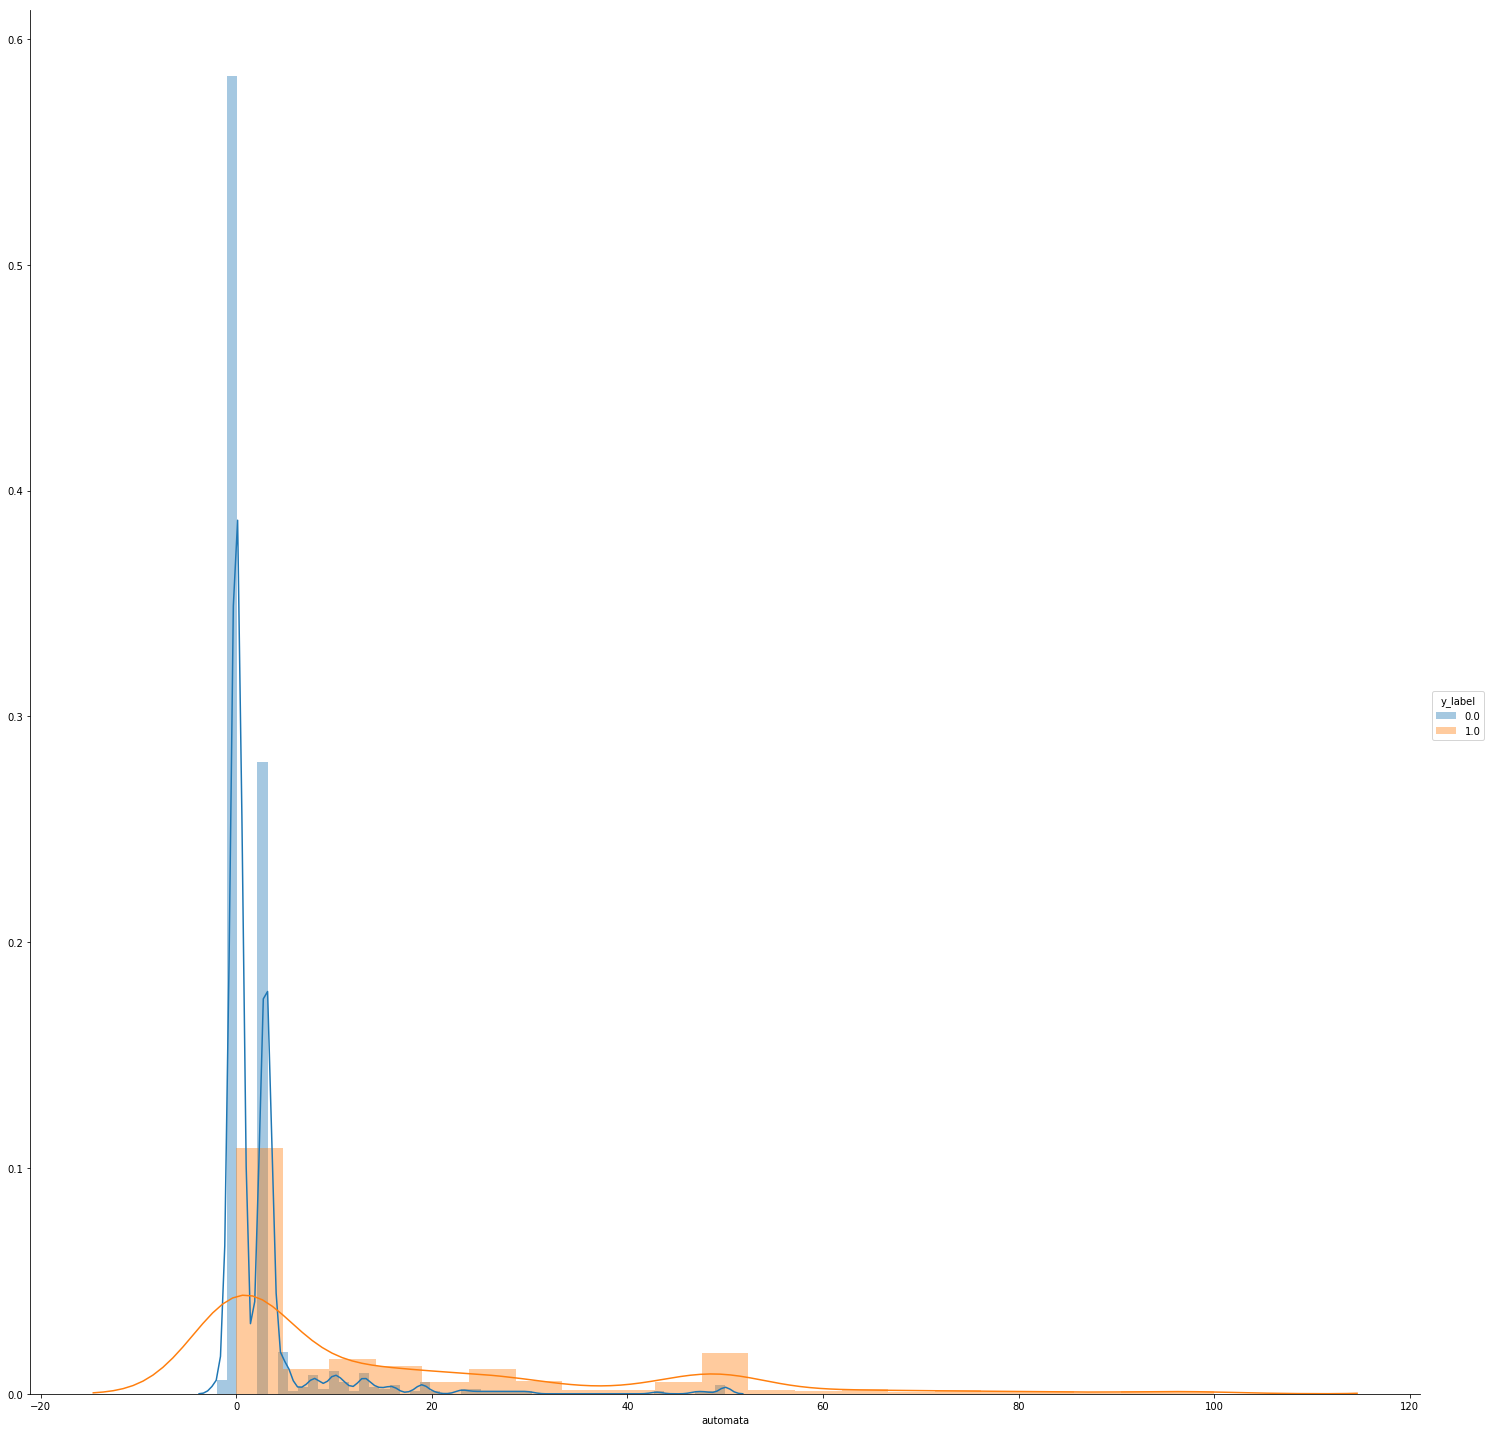

In [13]:
sns.FacetGrid(data , hue = "y_label", size = 20 ).map(sns.distplot, "automata").add_legend()
plt.show()

1. this distribution follows the most of the pareto distribution in nature

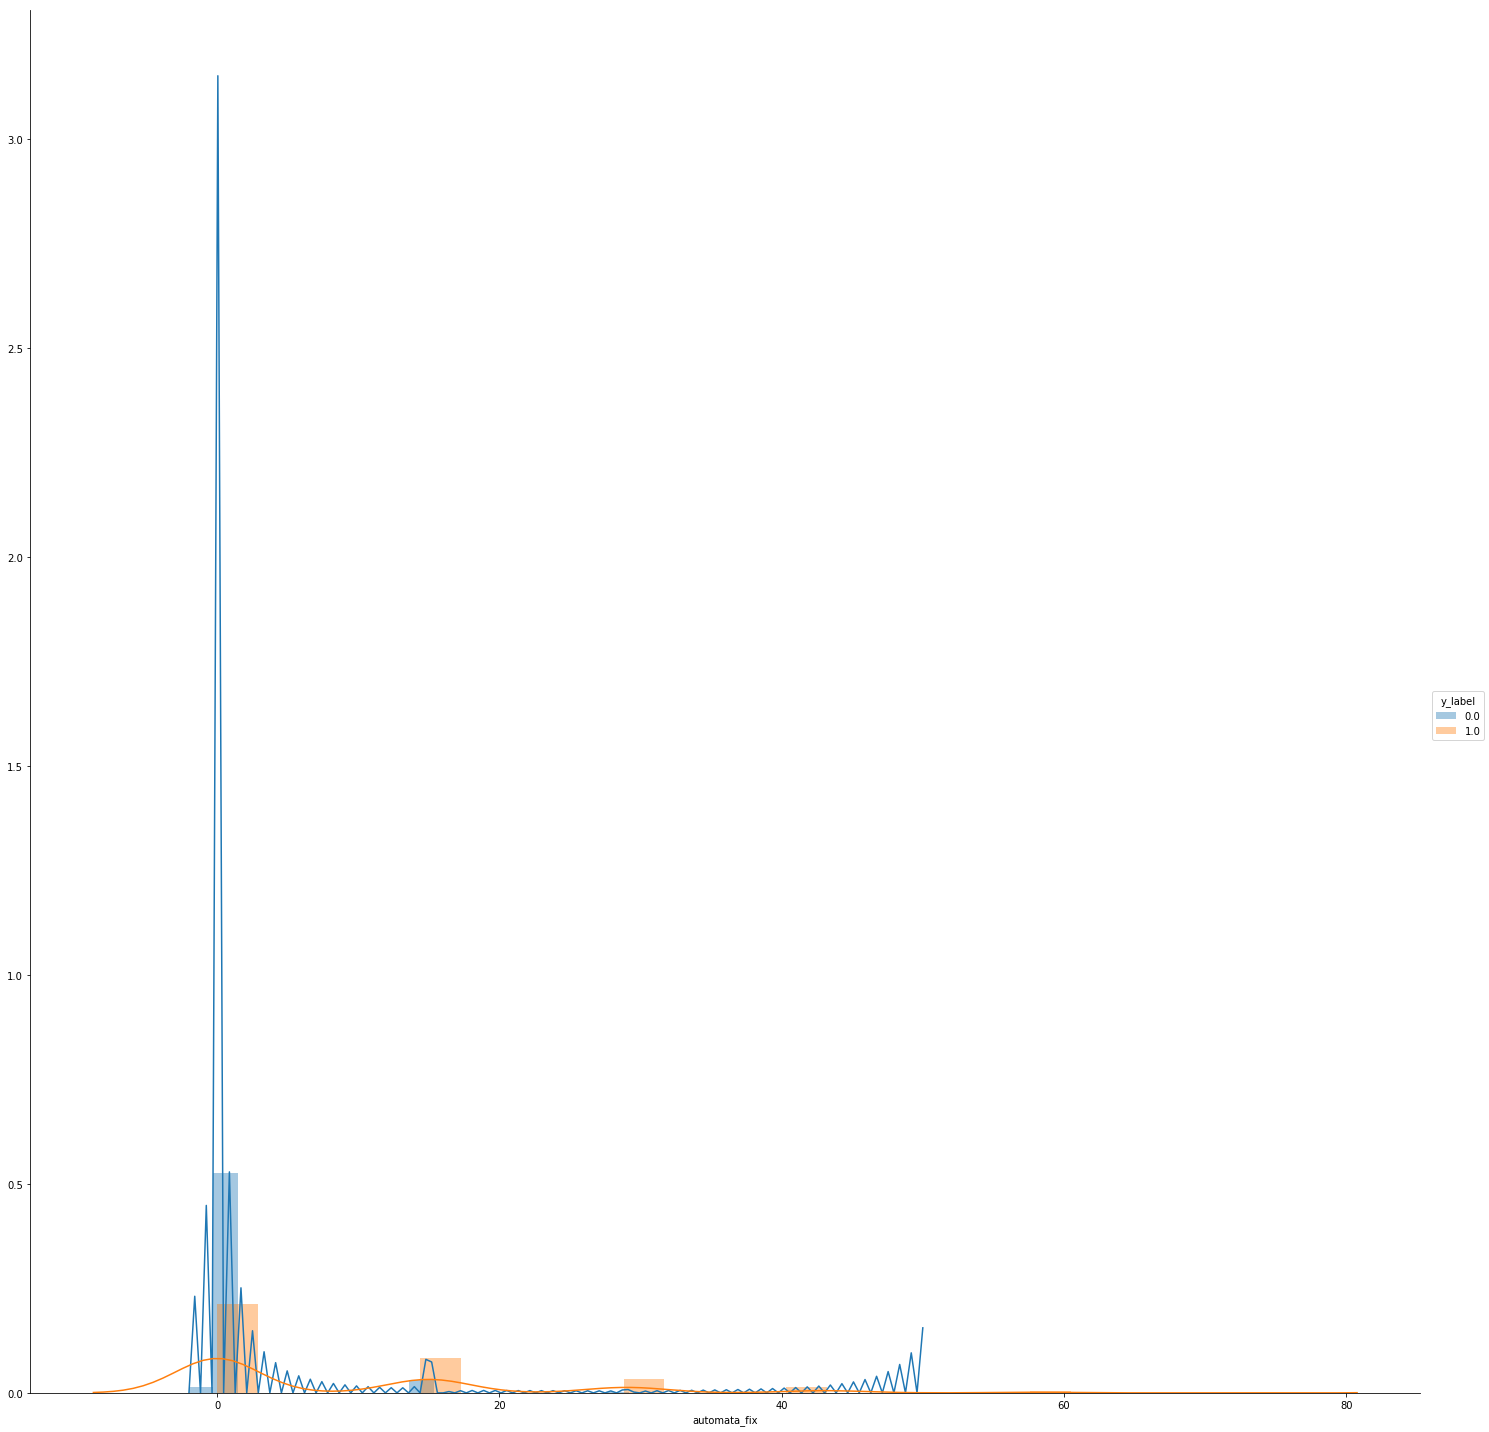

In [14]:
sns.FacetGrid(data , hue = "y_label", size = 20 ).map(sns.distplot, "automata_fix").add_legend()
plt.show()

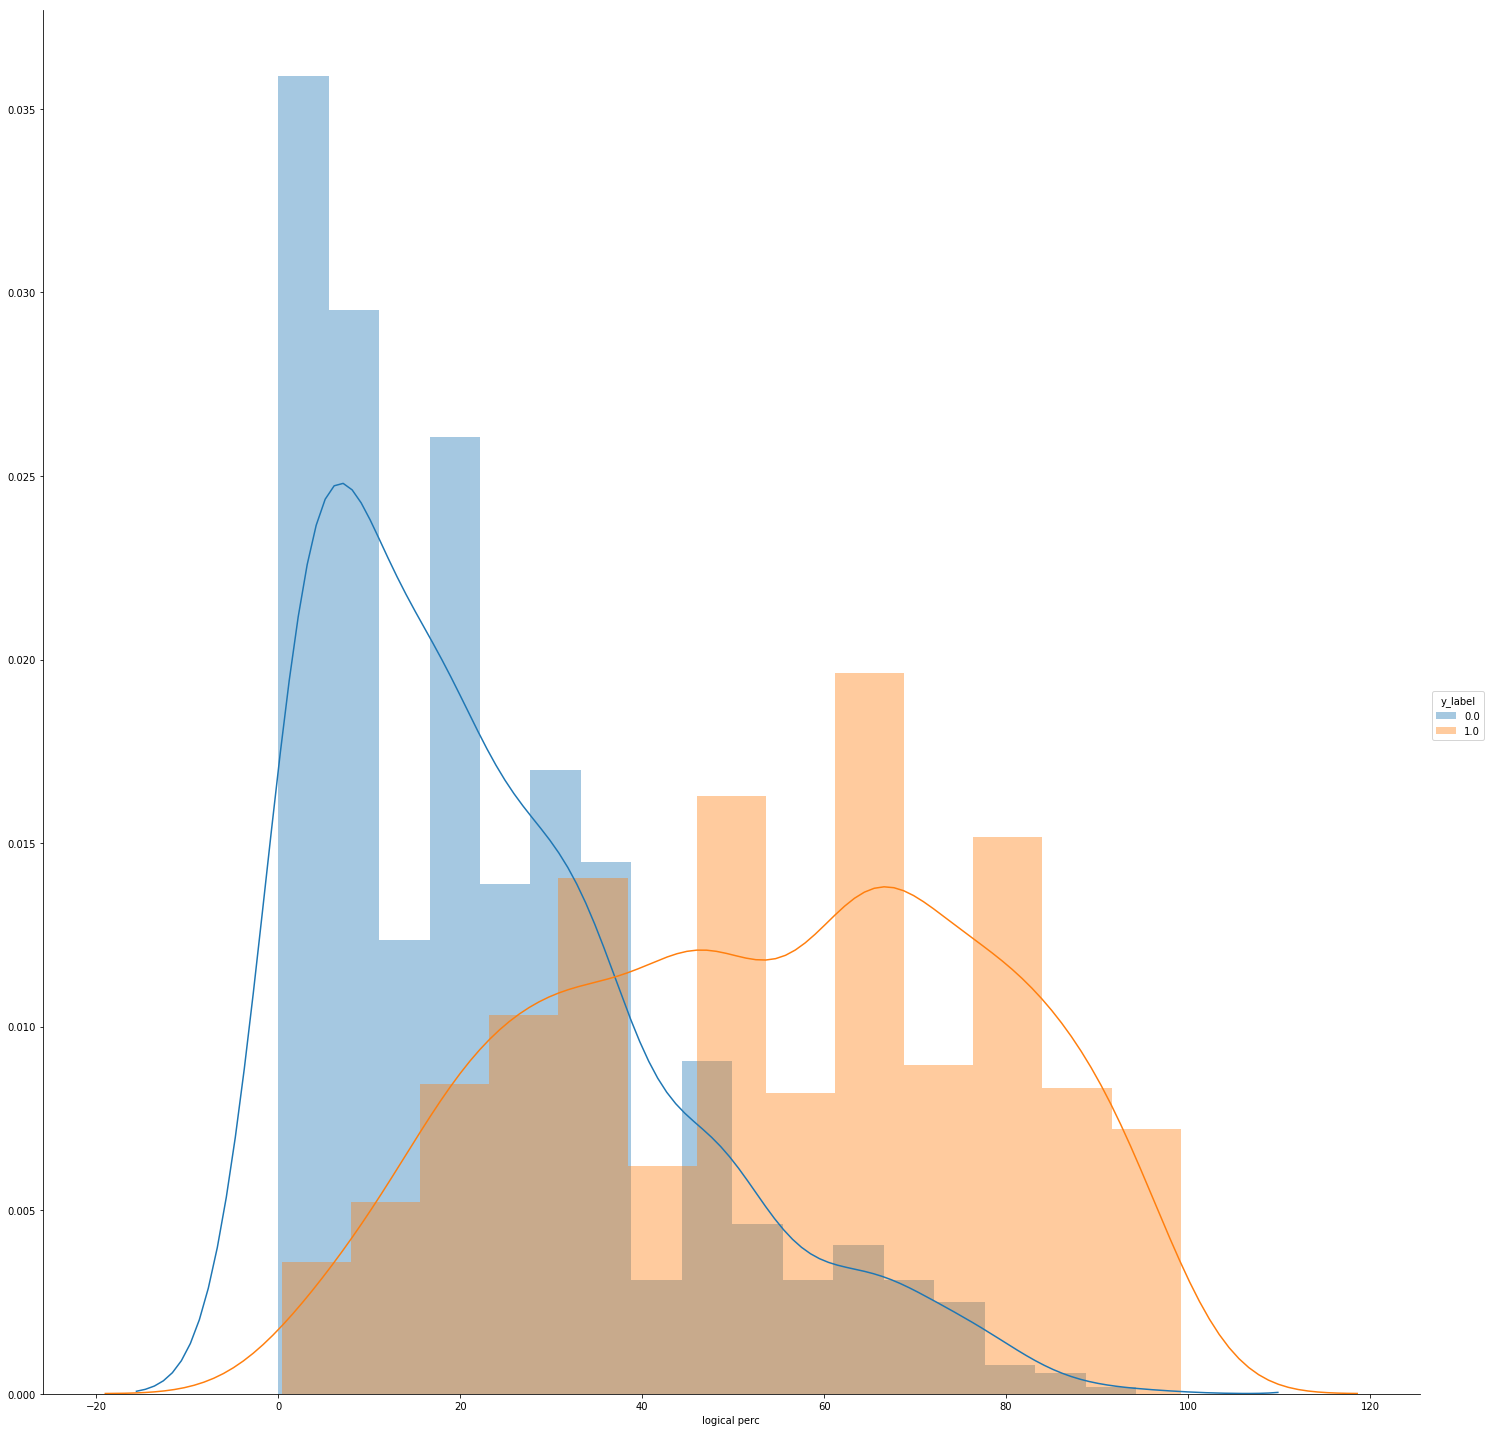

In [15]:
sns.FacetGrid(data , hue = "y_label", size = 20 ).map(sns.distplot, "logical perc").add_legend()
plt.show()

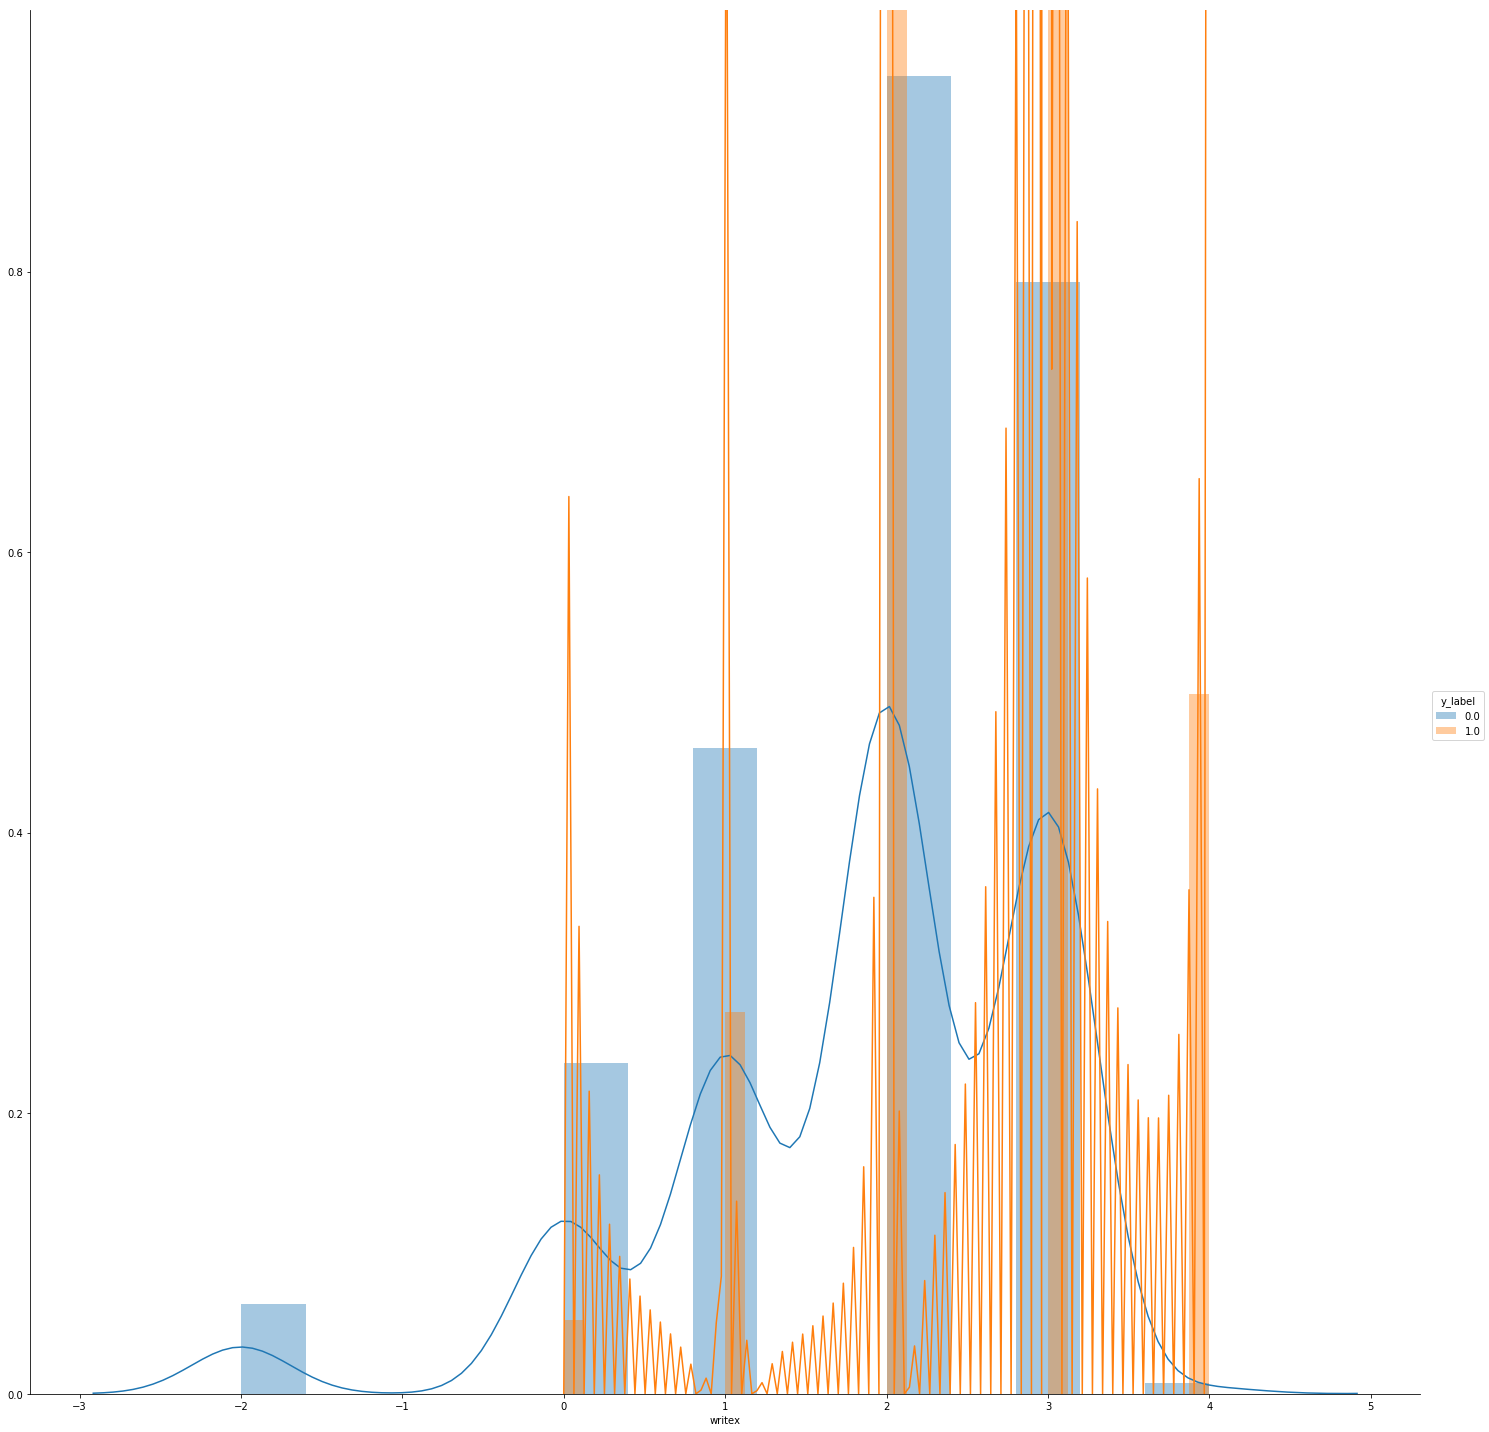

In [16]:
sns.FacetGrid(data , hue = "y_label", size = 20 ).map(sns.distplot, "writex").add_legend()
plt.show()

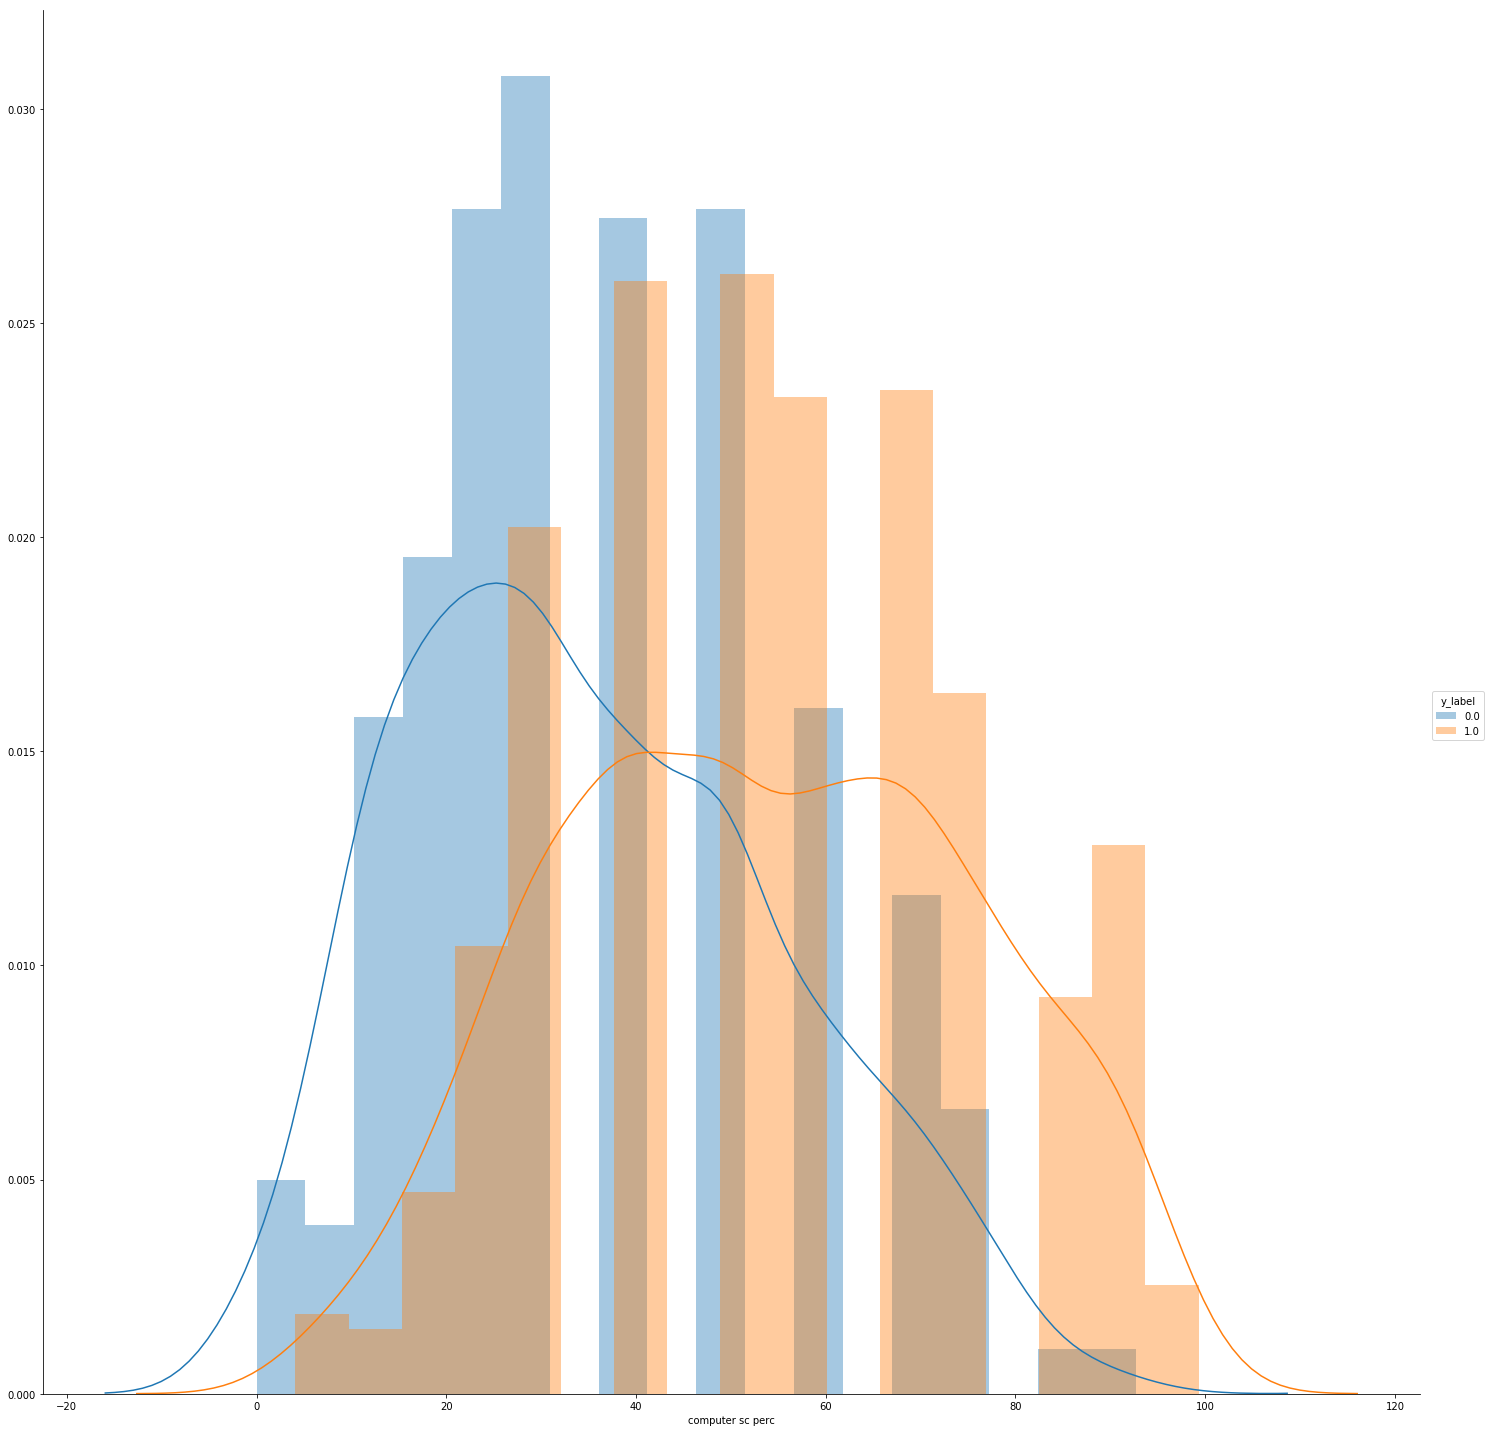

In [17]:
sns.FacetGrid(data , hue = "y_label", size = 20 ).map(sns.distplot, "computer sc perc").add_legend()
plt.show()

In [173]:
d.iloc[:,:15]

0      1
1      1
2      0
3      0
4      0
5      1
6      0
7      1
8      0
9      0
10     0
11     0
12     0
13     0
14     1
15     1
16     0
17     0
18     0
19     0
20     0
21     0
22     1
23     0
24     1
25     0
26     0
27     1
28     1
29     0
      ..
959    0
960    0
961    1
962    0
963    0
964    0
965    1
966    0
967    0
968    0
969    0
970    0
971    0
972    0
973    0
974    0
975    0
976    0
977    0
978    0
979    0
980    0
981    0
982    1
983    1
984    0
985    0
986    0
987    0
988    0
Name: ON/OFF Campus=0, Length: 989, dtype: int64

In [28]:
d.head(2)

,10th_percentage,12th_percentage,collegePercentage,WriteX_Total Score,English Comprehension(Score_1),English Comprehension(Percentile_1),Logical Ability(Score_13),Logical Ability(Percentile_13),Quantitative Ability (Advanced)(Score_2),Quantitative Ability (Advanced)(Percentile_2),Computer Programming(Score_5),Computer Programming(Percentile_5),Automata(Score_812),Computer Science(Score_189),Computer Science(Percentile_189),ON/OFF Campus=0,Total
0,88.00,71.0,62.0,1,500,59.9,485,57.8,460,38.0,355,34.9,0,346,39.3,1,2597.90
1,80.67,93.4,85.0,3,665,97.1,555,81.4,695,95.9,725,99.7,0,531,88.6,1,3895.77


In [10]:
print(d_2000.shape+d_2003.shape+d_4000.shape+d_3004.shape)

NameError: name 'd_2000' is not defined

In [106]:
d.columns

Index(['10th_percentage', '12th_percentage', 'collegePercentage',
       'WriteX_Total Score', 'English Comprehension(Score_1)',
       'English Comprehension(Percentile_1)', 'Logical Ability(Score_13)',
       'Logical Ability(Percentile_13)',
       'Quantitative Ability (Advanced)(Score_2)',
       'Quantitative Ability (Advanced)(Percentile_2)',
       'Computer Programming(Score_5)', 'Computer Programming(Percentile_5)',
       'Automata(Score_812)', 'Computer Science(Score_189)',
       'Computer Science(Percentile_189)', 'ON/OFF Campus=0', 'Total'],
      dtype='object')

In [107]:
d.iloc[:,16].min()
data.head(10)
r=pd.DataFrame(index=["<2000","2000-3000","3000-4000",">4000"],columns=['10th_percentage', '12th_percentage', 'collegePercentage',
       'WriteX_Total Score', 'English Comprehension(Score_1)',
       'English Comprehension(Percentile_1)', 'Logical Ability(Score_13)',
       'Logical Ability(Percentile_13)',
       'Quantitative Ability (Advanced)(Score_2)',
       'Quantitative Ability (Advanced)(Percentile_2)',
       'Computer Programming(Score_5)', 'Computer Programming(Percentile_5)',
       'Automata(Score_812)', 'Computer Science(Score_189)',
       'Computer Science(Percentile_189)'])

In [108]:
r

,10th_percentage,12th_percentage,collegePercentage,WriteX_Total Score,English Comprehension(Score_1),English Comprehension(Percentile_1),Logical Ability(Score_13),Logical Ability(Percentile_13),Quantitative Ability (Advanced)(Score_2),Quantitative Ability (Advanced)(Percentile_2),Computer Programming(Score_5),Computer Programming(Percentile_5),Automata(Score_812),Computer Science(Score_189),Computer Science(Percentile_189)
<2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3000-4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
>4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
for i in range(4):
    if i==0:
        s=d_2000
    elif i==1:
        s=d_2003
    elif i==2:
        s=d_3004
    else: s=d_4000
    for j in range(15):
        r.iloc[i,j]=s.iloc[:,j].mean()

In [110]:
r

,10th_percentage,12th_percentage,collegePercentage,WriteX_Total Score,English Comprehension(Score_1),English Comprehension(Percentile_1),Logical Ability(Score_13),Logical Ability(Percentile_13),Quantitative Ability (Advanced)(Score_2),Quantitative Ability (Advanced)(Percentile_2),Computer Programming(Score_5),Computer Programming(Percentile_5),Automata(Score_812),Computer Science(Score_189),Computer Science(Percentile_189)
<2000,59.904,45.3867,56.0149,1.55224,356.269,16.5478,367.985,20.2881,266.418,5.55075,269.716,19.4642,0.0447761,285.701,26.2463
2000-3000,67.1811,64.7664,68.4038,2.34653,496.287,56.376,467.248,50.9426,414.376,31.1493,398.719,50.4271,2.65941,357.01,44.0899
3000-4000,75.7065,77.1886,76.3023,2.63391,591.732,82.3887,557.58,78.2251,602.248,75.6668,518.998,80.9752,15.5553,439.482,65.2939
>4000,84.2,85.7,84.4,3.2,693.5,97.41,639.5,93.92,777,98.96,647,97.36,39.9,567.7,89.61


In [32]:
r.iloc[:,0].mean()

71.747918597043252

In [33]:
d_2004.iloc[:,16].max()

NameError: name 'd_2004' is not defined

In [34]:
r.to_excel("./2015sheet.xlsx")

In [35]:

s=pd.DataFrame(index=["Accuracy"])

In [36]:
r.shape

(4, 15)

In [37]:
r

,10th_percentage,12th_percentage,collegePercentage,WriteX_Total Score,English Comprehension(Score_1),English Comprehension(Percentile_1),Logical Ability(Score_13),Logical Ability(Percentile_13),Quantitative Ability (Advanced)(Score_2),Quantitative Ability (Advanced)(Percentile_2),Computer Programming(Score_5),Computer Programming(Percentile_5),Automata(Score_812),Computer Science(Score_189),Computer Science(Percentile_189)
<2000,59.904,45.3867,56.0149,1.55224,356.269,16.5478,367.985,20.2881,266.418,5.55075,269.716,19.4642,0.0447761,285.701,26.2463
2000-3000,67.1811,64.7664,68.4038,2.34653,496.287,56.376,467.248,50.9426,414.376,31.1493,398.719,50.4271,2.65941,357.01,44.0899
3000-4000,75.7065,77.1886,76.3023,2.63391,591.732,82.3887,557.58,78.2251,602.248,75.6668,518.998,80.9752,15.5553,439.482,65.2939
>4000,84.2,85.7,84.4,3.2,693.5,97.41,639.5,93.92,777,98.96,647,97.36,39.9,567.7,89.61


In [38]:
r

,10th_percentage,12th_percentage,collegePercentage,WriteX_Total Score,English Comprehension(Score_1),English Comprehension(Percentile_1),Logical Ability(Score_13),Logical Ability(Percentile_13),Quantitative Ability (Advanced)(Score_2),Quantitative Ability (Advanced)(Percentile_2),Computer Programming(Score_5),Computer Programming(Percentile_5),Automata(Score_812),Computer Science(Score_189),Computer Science(Percentile_189)
<2000,59.904,45.3867,56.0149,1.55224,356.269,16.5478,367.985,20.2881,266.418,5.55075,269.716,19.4642,0.0447761,285.701,26.2463
2000-3000,67.1811,64.7664,68.4038,2.34653,496.287,56.376,467.248,50.9426,414.376,31.1493,398.719,50.4271,2.65941,357.01,44.0899
3000-4000,75.7065,77.1886,76.3023,2.63391,591.732,82.3887,557.58,78.2251,602.248,75.6668,518.998,80.9752,15.5553,439.482,65.2939
>4000,84.2,85.7,84.4,3.2,693.5,97.41,639.5,93.92,777,98.96,647,97.36,39.9,567.7,89.61


In [39]:
s

""
Accuracy


In [360]:
s=s.transpose

AttributeError: 'function' object has no attribute 'transpose'

In [412]:
s

,KNN,LR,DCT,RMC
Accuracy,0.762626,0.69697,0.792929,0.777778


In [417]:
s.iloc[0,:]

KNN    0.762626
LR     0.696970
DCT    0.792929
RMC    0.777778
Name: Accuracy, dtype: float64

In [390]:
s.s[0].plot.bar()

AttributeError: 'DataFrame' object has no attribute 's'

In [454]:
ob=('KNN', 'LR', 'DTC' , 'RFC')
y_pos=np.arange(len(ob))

In [455]:
perf=s.iloc[0,:]

In [456]:
perf

KNN    0.762626
LR     0.696970
DCT    0.792929
RMC    0.777778
Name: Accuracy, dtype: float64

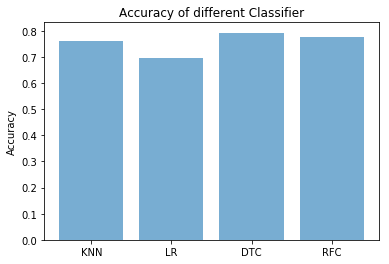

In [457]:
plt.bar(y_pos,perf, align='center', alpha=0.6)
plt.xticks(y_pos, ob)
plt.ylabel('Accuracy')
plt.title('Accuracy of different Classifier')
plt.show()

In [444]:
y_pos

array([0, 1, 2, 3, 4, 5, 6, 7])

In [470]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, axisbg="1.0")

data = (d.iloc[:,16],d.iloc[:,15])
colors = ("red", "green")
groups = ("coffee", )
for data, color, group in zip(data, colors, groups):
x, y = data
ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

plt.title('Matplot scatter plot')
plt.legend(loc=2)
plt.show()


IndentationError: expected an indented block (<ipython-input-470-b93b1c2d10ec>, line 8)

In [464]:
d.columns

Index(['10th_percentage', '12th_percentage', 'collegePercentage',
       'WriteX_Total Score', 'English Comprehension(Score_1)',
       'English Comprehension(Percentile_1)', 'Logical Ability(Score_13)',
       'Logical Ability(Percentile_13)',
       'Quantitative Ability (Advanced)(Score_2)',
       'Quantitative Ability (Advanced)(Percentile_2)',
       'Computer Programming(Score_5)', 'Computer Programming(Percentile_5)',
       'Automata(Score_812)', 'Computer Science(Score_189)',
       'Computer Science(Percentile_189)', 'ON/OFF Campus=0', 'Total'],
      dtype='object')

In [477]:
print(d.shape)
d

(989, 17)


,10th_percentage,12th_percentage,collegePercentage,WriteX_Total Score,English Comprehension(Score_1),English Comprehension(Percentile_1),Logical Ability(Score_13),Logical Ability(Percentile_13),Quantitative Ability (Advanced)(Score_2),Quantitative Ability (Advanced)(Percentile_2),Computer Programming(Score_5),Computer Programming(Percentile_5),Automata(Score_812),Computer Science(Score_189),Computer Science(Percentile_189),ON/OFF Campus=0,Total
0,88.00,71.00,62.0,1,500,59.9,485,57.8,460,38.0,355,34.9,0,346,39.3,1,2597.90
1,80.67,93.40,85.0,3,665,97.1,555,81.4,695,95.9,725,99.7,0,531,88.6,1,3895.77
2,85.50,68.00,70.0,3,545,75.8,445,42.2,285,3.4,185,3.2,0,285,22.4,0,2118.50
3,80.00,68.90,71.0,3,580,85.3,540,77.1,475,43.1,515,83.9,0,469,76.2,0,3167.50
4,94.00,72.00,68.0,3,510,63.7,445,42.2,520,58.6,335,28.8,0,408,58.9,0,2707.20
5,83.00,73.00,80.0,3,430,32.6,445,42.2,535,63.6,445,65.1,0,408,58.9,1,2764.40
6,6.50,6.92,60.0,0,300,4.0,410,29.3,310,5.4,175,2.6,0,254,15.7,0,1579.42
7,9.20,74.80,75.0,3,570,82.9,570,85.1,535,63.6,455,68.2,0,346,39.3,1,2977.10
8,8.60,66.00,69.0,2,545,75.8,565,83.9,560,71.4,425,58.5,0,377,49.0,0,2956.20
9,57.00,60.60,69.0,2,335,8.1,445,42.2,300,4.5,275,14.1,0,315,30.2,0,1957.70


In [23]:
r

,10th_percentage,12th_percentage,collegePercentage,WriteX_Total Score,English Comprehension(Score_1),English Comprehension(Percentile_1),Logical Ability(Score_13),Logical Ability(Percentile_13),Quantitative Ability (Advanced)(Score_2),Quantitative Ability (Advanced)(Percentile_2),Computer Programming(Score_5),Computer Programming(Percentile_5),Automata(Score_812),Computer Science(Score_189),Computer Science(Percentile_189)
<2000,59.904,45.3867,56.0149,1.55224,356.269,16.5478,367.985,20.2881,266.418,5.55075,269.716,19.4642,0.0447761,285.701,26.2463
2000-3000,67.1811,64.7664,68.4038,2.34653,496.287,56.376,467.248,50.9426,414.376,31.1493,398.719,50.4271,2.65941,357.01,44.0899
3000-4000,75.7065,77.1886,76.3023,2.63391,591.732,82.3887,557.58,78.2251,602.248,75.6668,518.998,80.9752,15.5553,439.482,65.2939
>4000,84.2,85.7,84.4,3.2,693.5,97.41,639.5,93.92,777,98.96,647,97.36,39.9,567.7,89.61


In [26]:
r.plot()

In [52]:
e=r.iloc[0,:]

In [53]:
print(e.transpose)

<bound method IndexOpsMixin.transpose of 10th_percentage                                     59.904
12th_percentage                                    45.3867
collegePercentage                                  56.0149
WriteX_Total Score                                 1.55224
English Comprehension(Score_1)                     356.269
English Comprehension(Percentile_1)                16.5478
Logical Ability(Score_13)                          367.985
Logical Ability(Percentile_13)                     20.2881
Quantitative Ability (Advanced)(Score_2)           266.418
Quantitative Ability (Advanced)(Percentile_2)      5.55075
Computer Programming(Score_5)                      269.716
Computer Programming(Percentile_5)                 19.4642
Automata(Score_812)                              0.0447761
Computer Science(Score_189)                        285.701
Computer Science(Percentile_189)                   26.2463
Name: <2000, dtype: object>


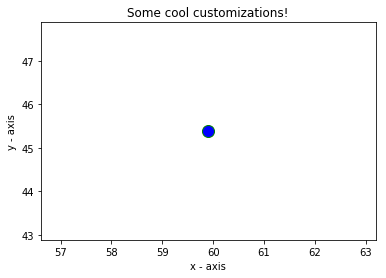

In [55]:
plt.plot(e[0], e[1], color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
  
# setting x and y axis range 
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Some cool customizations!') 
  
# function to show the plot 
plt.show() 

In [19]:
d.iloc[0,10]

355

In [95]:
d.columns

Index(['10th_percentage', '12th_percentage', 'collegePercentage',
       'WriteX_Total Score', 'English Comprehension(Score_1)',
       'English Comprehension(Percentile_1)', 'Logical Ability(Score_13)',
       'Logical Ability(Percentile_13)',
       'Quantitative Ability (Advanced)(Score_2)',
       'Quantitative Ability (Advanced)(Percentile_2)',
       'Computer Programming(Score_5)', 'Computer Programming(Percentile_5)',
       'Automata(Score_812)', 'Computer Science(Score_189)',
       'Computer Science(Percentile_189)', 'ON/OFF Campus=0', 'Total'],
      dtype='object')

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.asarray(d[['Computer Programming(Score_5)']])
Y = np.asarray(d['Total'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Score:  0.620654073927
Weights:  [ 3.82846534]


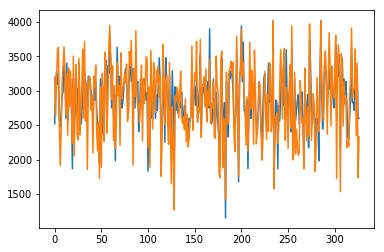

In [13]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

In [17]:
X = np.asarray([[500]])
            

In [18]:
s=lineReg.predict(X)[0]
s

3074.8762085333137

In [19]:
d.head(5)

,10th_percentage,12th_percentage,collegePercentage,WriteX_Total Score,English Comprehension(Score_1),English Comprehension(Percentile_1),Logical Ability(Score_13),Logical Ability(Percentile_13),Quantitative Ability (Advanced)(Score_2),Quantitative Ability (Advanced)(Percentile_2),Computer Programming(Score_5),Computer Programming(Percentile_5),Automata(Score_812),Computer Science(Score_189),Computer Science(Percentile_189),ON/OFF Campus=0,Total
0,88.00,71.0,62.0,1,500,59.9,485,57.8,460,38.0,355,34.9,0,346,39.3,1,2597.90
1,80.67,93.4,85.0,3,665,97.1,555,81.4,695,95.9,725,99.7,0,531,88.6,1,3895.77
2,85.50,68.0,70.0,3,545,75.8,445,42.2,285,3.4,185,3.2,0,285,22.4,0,2118.50
3,80.00,68.9,71.0,3,580,85.3,540,77.1,475,43.1,515,83.9,0,469,76.2,0,3167.50
4,94.00,72.0,68.0,3,510,63.7,445,42.2,520,58.6,335,28.8,0,408,58.9,0,2707.20


In [20]:
d.columns

Index(['10th_percentage', '12th_percentage', 'collegePercentage',
       'WriteX_Total Score', 'English Comprehension(Score_1)',
       'English Comprehension(Percentile_1)', 'Logical Ability(Score_13)',
       'Logical Ability(Percentile_13)',
       'Quantitative Ability (Advanced)(Score_2)',
       'Quantitative Ability (Advanced)(Percentile_2)',
       'Computer Programming(Score_5)', 'Computer Programming(Percentile_5)',
       'Automata(Score_812)', 'Computer Science(Score_189)',
       'Computer Science(Percentile_189)', 'ON/OFF Campus=0', 'Total'],
      dtype='object')

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.asarray(d[['Computer Programming(Score_5)','Automata(Score_812)']])
Y = np.asarray(d['Total'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Score:  0.60984761952
Weights:  [ 3.73365508  4.34083452]


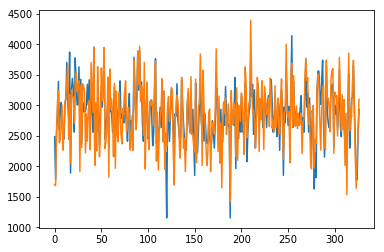

In [22]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)
plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

In [23]:
dict={}

In [24]:
dict={1:'10th_percentage', 2:'12th_percentage', 3:'collegePercentage',
       4:'WriteX_Total Score', 5:'English Comprehension(Score_1)',
       6: 'Logical Ability(Score_13)',
        7:'Quantitative Ability (Advanced)(Score_2)',
       8:'Computer Programming(Score_5)',9:'Automata(Score_812)', 10:'Computer Science(Score_189)'}

In [25]:
_2=list(r.columns)

NameError: name 'r' is not defined

In [130]:
_2

['10th_percentage',
 '12th_percentage',
 'collegePercentage',
 'WriteX_Total Score',
 'English Comprehension(Score_1)',
 'English Comprehension(Percentile_1)',
 'Logical Ability(Score_13)',
 'Logical Ability(Percentile_13)',
 'Quantitative Ability (Advanced)(Score_2)',
 'Quantitative Ability (Advanced)(Percentile_2)',
 'Computer Programming(Score_5)',
 'Computer Programming(Percentile_5)',
 'Automata(Score_812)',
 'Computer Science(Score_189)',
 'Computer Science(Percentile_189)']

In [135]:
df = pd.DataFrame({'lab':_2, 'val':_3})
ax = df.plot.bar(x='lab', y='val', rot=0)

In [150]:
r.index

Index(['<2000', '2000-3000', '3000-4000', '>4000'], dtype='object')

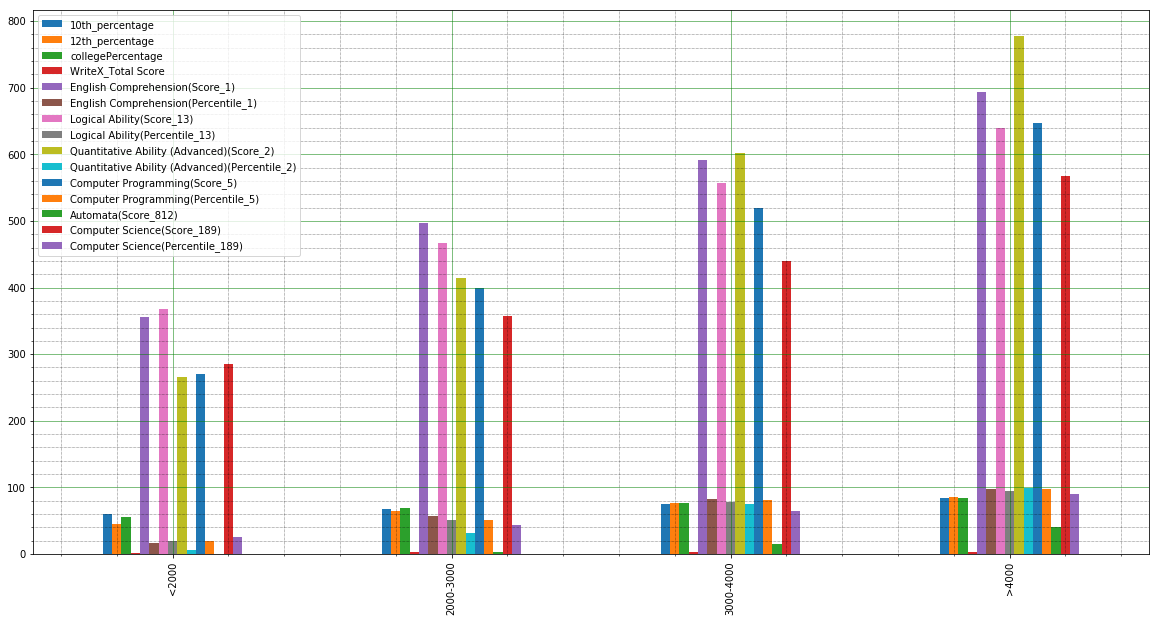

In [212]:
df=pd.DataFrame(r, columns=r.columns, index=r.index)

df.plot(kind='bar',figsize=(20,10))
# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.legend(loc='best') 
plt.show()

In [121]:
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
df = pd.DataFrame({'lifespan': _3}, index=_2)
ax = df.plot.bar(rot=0)

In [114]:
r

,10th_percentage,12th_percentage,collegePercentage,WriteX_Total Score,English Comprehension(Score_1),English Comprehension(Percentile_1),Logical Ability(Score_13),Logical Ability(Percentile_13),Quantitative Ability (Advanced)(Score_2),Quantitative Ability (Advanced)(Percentile_2),Computer Programming(Score_5),Computer Programming(Percentile_5),Automata(Score_812),Computer Science(Score_189),Computer Science(Percentile_189)
<2000,59.904,45.3867,56.0149,1.55224,356.269,16.5478,367.985,20.2881,266.418,5.55075,269.716,19.4642,0.0447761,285.701,26.2463
2000-3000,67.1811,64.7664,68.4038,2.34653,496.287,56.376,467.248,50.9426,414.376,31.1493,398.719,50.4271,2.65941,357.01,44.0899
3000-4000,75.7065,77.1886,76.3023,2.63391,591.732,82.3887,557.58,78.2251,602.248,75.6668,518.998,80.9752,15.5553,439.482,65.2939
>4000,84.2,85.7,84.4,3.2,693.5,97.41,639.5,93.92,777,98.96,647,97.36,39.9,567.7,89.61


10th_percentage                                  67.1811
12th_percentage                                  64.7664
collegePercentage                                68.4038
WriteX_Total Score                               2.34653
English Comprehension(Score_1)                   496.287
English Comprehension(Percentile_1)               56.376
Logical Ability(Score_13)                        467.248
Logical Ability(Percentile_13)                   50.9426
Quantitative Ability (Advanced)(Score_2)         414.376
Quantitative Ability (Advanced)(Percentile_2)    31.1493
Computer Programming(Score_5)                    398.719
Computer Programming(Percentile_5)               50.4271
Automata(Score_812)                              2.65941
Computer Science(Score_189)                       357.01
Computer Science(Percentile_189)                 44.0899
Name: 2000-3000, dtype: object